In [1]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras

from keras import backend as K
#K.set_image_dim_ordering('tf')

K.set_image_data_format("channels_last")

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
from keras.optimizers import SGD


Using TensorFlow backend.


In [2]:
path=r'C:\Users\mishr\CNN\AUGUMENTED\cv2'
directories = os.listdir(path)
directories

['SAREE', 'SHIRT', 'TSHIRT']

In [3]:
#i'll resize the all the images to a standard size of 128*128
im_hg=128
im_wg=128
channel=1 #as all my images are grey scale

In [4]:
#creating a list to store the images extracted         
imgs=[]
for ds in directories:
    img_list=os.listdir(path+'/'+ ds)
    print ('Extracting images from',(ds))
    
    for i in img_list:
        input_img=cv2.imread(path + '/'+ ds + '/'+ i )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        img_resize=cv2.resize(input_img,(128,128))
        imgs.append(img_resize)
           
img_data = np.array(imgs).astype('float32')
img_data =img_data/255 #normalization

print (img_data.shape)

Extracting images from SAREE
Extracting images from SHIRT
Extracting images from TSHIRT
(1800, 128, 128)


In [5]:
#checking channel configuration
if channel==1:
    if K.image_data_format()==("channels_first"):
    
        img_data= np.expand_dims(img_data, axis=1) 
        print("Theano ordering has been used /n")
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=3) 
        print("Tensorflow ordering has been used")
        print (img_data.shape)
else:
    if K.image_data_format()==("channels_first"):
        img_data=np.rollaxis(img_data,3,1)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)

Tensorflow ordering has been used
(1800, 128, 128, 1)


In [6]:
classes=3
class_name=["SAREE","SHIRT",'TSHIRT']
sample_length=img_data.shape[0]

labels = np.ones((sample_length,),dtype="int64") #it'll create a matrix of 1*1

#assigning values, we know that we have 600 images in each folder so assigning values according to them

labels[0:600]=0
labels[600:1200]=1
labels[1200:1800]=2

In [7]:
#using one_hot encoding
Y=np_utils.to_categorical(labels,classes)

In [8]:
#using shuffle and train_test_split methods of sklearn for shuffling and splitting the dataset
x,y = shuffle(img_data,Y, random_state=4)

# Splitting the dataset in 80_20 ratio 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [9]:
print("Shape of x_train:\t",x_train.shape)
print("\nShape of x_test:\t",x_test.shape)
print("\nShape of y_train:\t",y_train.shape)
print("\nShape of y_test:\t",y_test.shape)

Shape of x_train:	 (1440, 128, 128, 1)

Shape of x_test:	 (360, 128, 128, 1)

Shape of y_train:	 (1440, 3)

Shape of y_test:	 (360, 3)


In [10]:
ip_shape=img_data[0].shape
ip_shape

(128, 128, 1)

In [11]:
#building the cnn model
m=Sequential(name="SCRAPPED_IMAGE_DATASET")
m.add(Conv2D(32,(3,3),name="Conv_1",activation="relu",kernel_initializer='he_uniform',padding='same',input_shape=ip_shape))
m.add(MaxPooling2D(pool_size = (2,2)))

m.add(Conv2D(64,(3,3),name="Conv_2",activation="relu",kernel_initializer='he_uniform',padding='same'))
m.add(MaxPooling2D(pool_size = (2,2)))      
m.add(Dropout(0.5))
      
m.add(Conv2D(64, (3, 3), activation='relu',name="Conv_3" ,kernel_initializer='he_uniform', padding='same'))
m.add(MaxPooling2D((2, 2)))


m.add(Flatten())
      
m.add(Dense(64, activation='relu', kernel_initializer='he_uniform',name="HIDDEN_1"))
m.add(Dense(128, activation='relu', kernel_initializer='he_uniform',name="HIDDEN_2"))    
m.add(Dropout(0.5))
m.add(Dense(3, activation='softmax',name="OUTPUT"))
print("\nSummary:",m.summary())

Model: "SCRAPPED_IMAGE_DATASET"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 

In [12]:
#checking model configuration
m.get_config()

{'name': 'SCRAPPED_IMAGE_DATASET',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'Conv_1',
    'trainable': True,
    'batch_input_shape': (None, 128, 128, 1),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 2.0,
      'mode': 'fan_in',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d',
    'trainable': True,
    'dtype': 'float32',
    'pool_size': (2, 2),
    'padding': 'valid',
    'strides': (2, 2),
    'data_format'

In [13]:
#compiling the  model with SGD as optimizer
opt = SGD(lr=0.001, momentum=0.9)
m.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

In [14]:
#training the dataset
result = m.fit(x_train,y_train,batch_size =20,epochs=15,steps_per_epoch=np.floor(len(x_train)//20),validation_data = (x_test, y_test))

Epoch 1/15
72/72 [==============================] - 57s 790ms/step - loss: 1.3490 - accuracy: 0.3611 - val_loss: 1.0072 - val_accuracy: 0.4444
Epoch 2/15
72/72 [==============================] - 53s 735ms/step - loss: 0.9180 - accuracy: 0.5472 - val_loss: 0.8665 - val_accuracy: 0.6056
Epoch 3/15
72/72 [==============================] - 53s 729ms/step - loss: 0.8010 - accuracy: 0.6062 - val_loss: 0.7919 - val_accuracy: 0.5861
Epoch 4/15
72/72 [==============================] - 53s 731ms/step - loss: 0.7540 - accuracy: 0.6167 - val_loss: 0.7566 - val_accuracy: 0.6139
Epoch 5/15
72/72 [==============================] - 53s 734ms/step - loss: 0.7145 - accuracy: 0.6375 - val_loss: 0.7189 - val_accuracy: 0.6028
Epoch 6/15
72/72 [==============================] - 53s 734ms/step - loss: 0.6658 - accuracy: 0.6854 - val_loss: 0.6648 - val_accuracy: 0.7222
Epoch 7/15
72/72 [==============================] - 54s 747ms/step - loss: 0.6064 - accuracy: 0.7389 - val_loss: 0.6014 - val_accuracy: 0.7722

In [15]:
#visualization of loss and accuracy
record=result.history
record

{'loss': [1.3489669561386108,
  0.9179664850234985,
  0.8010013103485107,
  0.7540106773376465,
  0.7144519090652466,
  0.6658292412757874,
  0.6063891053199768,
  0.5505309700965881,
  0.5043647289276123,
  0.4842301607131958,
  0.4582611918449402,
  0.40845710039138794,
  0.392183780670166,
  0.35010063648223877,
  0.367256760597229],
 'accuracy': [0.3611111044883728,
  0.5472221970558167,
  0.606249988079071,
  0.6166666746139526,
  0.637499988079071,
  0.6854166388511658,
  0.7388888597488403,
  0.7833333611488342,
  0.8125,
  0.8118055462837219,
  0.8277778029441833,
  0.8506944179534912,
  0.862500011920929,
  0.8736110925674438,
  0.855555534362793],
 'val_loss': [1.0071650743484497,
  0.8665007948875427,
  0.7919498085975647,
  0.7566481828689575,
  0.7189140319824219,
  0.6647769212722778,
  0.601391077041626,
  0.5480482578277588,
  0.5007979273796082,
  0.48703402280807495,
  0.494025856256485,
  0.4620470404624939,
  0.3949274718761444,
  0.46210071444511414,
  0.3777857124

In [16]:
loss=record['loss']
acc=record['accuracy']
valid_loss=record['val_loss']
val_acu=record['val_accuracy']
epoch=range(1,len(loss)+1)

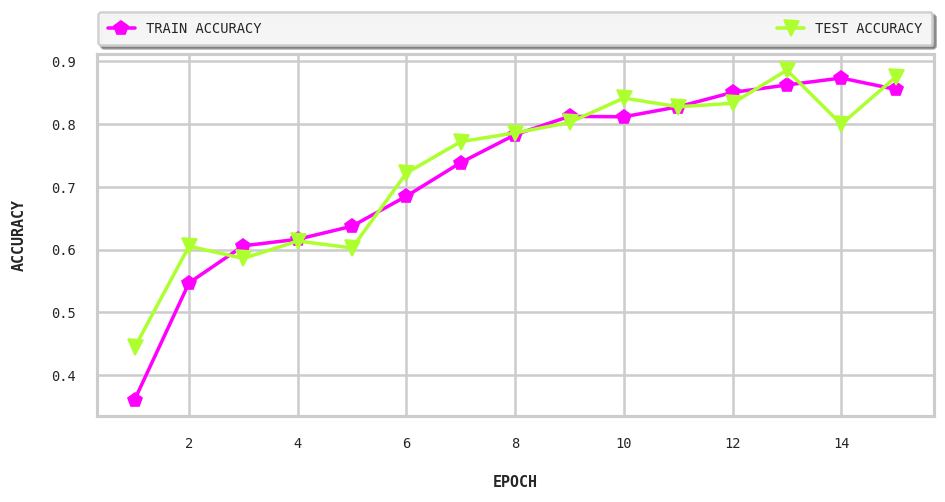

In [17]:
#PLOTTING ACCURACY VALUES

plt.figure(figsize=(9,4),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
l1=plt.plot(epoch,acc,label="TRAIN ACCURACY")
l2=plt.plot(epoch,val_acu,label="TEST ACCURACY")

plt.setp(l1,color='fuchsia',marker="p",linewidth=2.1)
plt.setp(l2,color='greenyellow',marker="v",linewidth=2.1)

plt.xlabel('\nEPOCH',weight='bold')
plt.ylabel('ACCURACY\n',weight='bold')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)

plt.show()

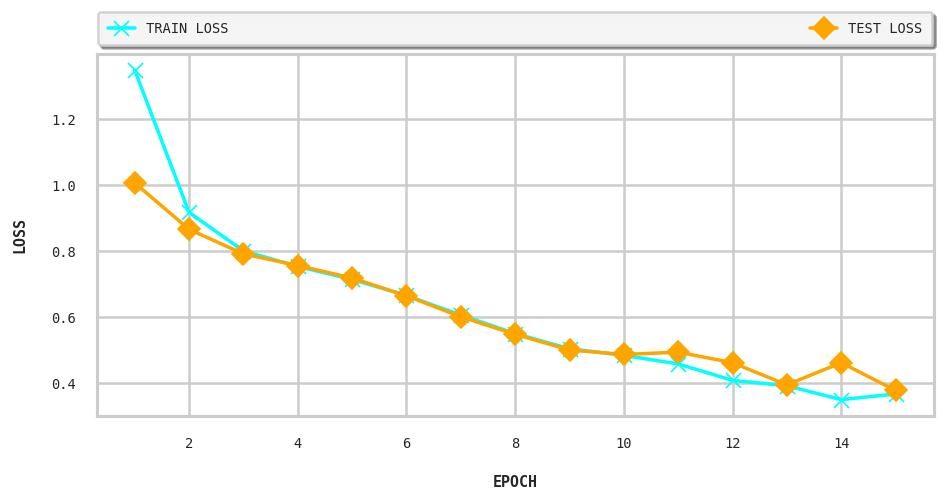

In [18]:
#PLOTTING LOSS VALUES
plt.figure(figsize=(9,4),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
l1=plt.plot(epoch,loss,label="TRAIN LOSS")
l2=plt.plot(epoch,valid_loss,label="TEST LOSS")

plt.setp(l1,color='aqua',marker="x",linewidth=2.1)
plt.setp(l2,color='orange',marker="D",linewidth=2.1)

plt.xlabel('\nEPOCH',weight='bold')
plt.ylabel('LOSS\n',weight='bold')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)

plt.show()

In [23]:
#predicting the results for test dataset
prediction= m.evaluate(x_test, y_test)
prediction 

12/12 [==============================] - 4s 309ms/step - loss: 0.3778 - accuracy: 0.8750


[0.37778574228286743, 0.875]

In [24]:
print("Prediction_TEST LOSS:\t",prediction[0]*100)
print("\nPrediction_TEST ACCURACY:\t",prediction[1]*100)

Prediction_TEST LOSS:	 37.77857422828674

Prediction_TEST ACCURACY:	 87.5


In [25]:
#checking the prediction of a random image from test dataset
testing = x_test[211:212]
print (testing.shape)

print(m.predict(testing))
print(m.predict_classes(testing))


(1, 128, 128, 1)
[[1.0892905e-04 8.9256803e-04 9.9899846e-01]]
[2]


**As per the prediction our image at 211 belongs to class 2 i.e. TSHIRT**

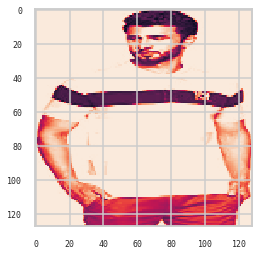

In [26]:
#visualizing the image used for prediction
im211 = testing.reshape((128,128))
plt.imshow(im211)
plt.show()

It's a correct prediction

**Doing prediction on  an unseen image**

Shape of test image (128, 128)


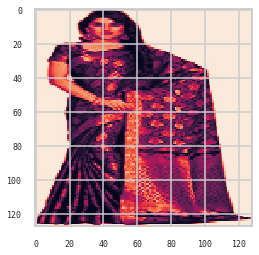

In [27]:
test1 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\imgsaree_621.jpeg")
test1=cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)
test1=cv2.resize(test1,(128,128))
test1 = np.array(test1)
test1 = test1.astype('float32')
test1 =test1/255
print ("Shape of test image",test1.shape)

plt.imshow(test1)
plt.show()

In [28]:
#here the shape is (128,128) so i have to define the no of channel and sample so that it can be processed
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test1, axis=0)
        test_img= np.expand_dims(test1, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test1,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test1,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test1, axis=0)
        print (test_image.shape)

Tensorflow ordering has been used
(1, 128, 128, 1)


In [29]:
#predicting the class
print(m.predict(test_img))
print("CLASS:", m.predict_classes(test_img))

[[9.9999988e-01 1.2755335e-07 5.1081415e-09]]
CLASS: [0]


  The prediction is correct.Class [0] belongs to SAREE

In [30]:
#saving the model
m.save("CNN.h5")
print("Saving Completed Successfully")

Saving Completed Successfully
